In [1]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [3]:
city_daily=pd.read_csv("city_day.csv")
city_daily.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
city_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26219 entries, 0 to 26218
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        26219 non-null  object 
 1   Date        26219 non-null  object 
 2   PM2.5       21930 non-null  float64
 3   PM10        15453 non-null  float64
 4   NO          22986 non-null  float64
 5   NO2         23002 non-null  float64
 6   NOx         22176 non-null  float64
 7   NH3         16372 non-null  float64
 8   CO          24258 non-null  float64
 9   SO2         22675 non-null  float64
 10  O3          22559 non-null  float64
 11  Benzene     20932 non-null  float64
 12  Toluene     18664 non-null  float64
 13  Xylene      9412 non-null   float64
 14  AQI         21937 non-null  float64
 15  AQI_Bucket  21937 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.2+ MB


In [5]:
miss_number=city_daily.isnull().sum()
miss_percent=(miss_number/city_daily.shape[0])*100
miss_table=pd.concat([miss_number,miss_percent],axis=1)
miss_table=miss_table.rename(columns={0: "Missing Values", 1: "Percent Missing"})
miss_table.sort_values(by="Percent Missing",ascending=False)

,Missing Values,Percent Missing
Xylene,16807,64.102369
PM10,10766,41.061825
NH3,9847,37.556734
Toluene,7555,28.814982
Benzene,5287,20.164766
PM2.5,4289,16.358366
AQI,4282,16.331668
AQI_Bucket,4282,16.331668
NOx,4043,15.420115
O3,3660,13.959342


In [6]:
print(len(city_daily['City'].value_counts()))
print(city_daily['City'].unique())

24
['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Delhi' 'Ernakulam' 'Gurugram'
 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata' 'Lucknow'
 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram']


In [7]:
city_daily['Date']=pd.to_datetime(city_daily['Date'])
city_daily['BTX']=city_daily['Benzene']+city_daily['Toluene']+city_daily['Xylene']
city_daily['PM']=city_daily['PM2.5']+city_daily['PM10']
city_daily.drop(["Benzene","Toluene","Xylene"],axis=1,inplace=True)
city_daily.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX,PM
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,NaN,NaN,0.02,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,NaN,NaN,12.95,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,NaN,NaN,25.45,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,NaN,NaN,15.57,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,NaN,NaN,28.68,NaN


In [8]:
city_dailypm=city_daily.copy()
city_daily.drop(["PM2.5","PM10"],axis=1,inplace =True)

In [9]:
city_daily.shape

(26219, 13)

In [10]:
city_daily_copy=city_daily.copy()
city_daily=city_dailypm
city_daily.drop(["BTX","NH3"],axis=1,inplace=True)

In [11]:
city_daily_new=city_daily.dropna()
city_daily_new.shape

(13051, 13)

In [12]:
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3']

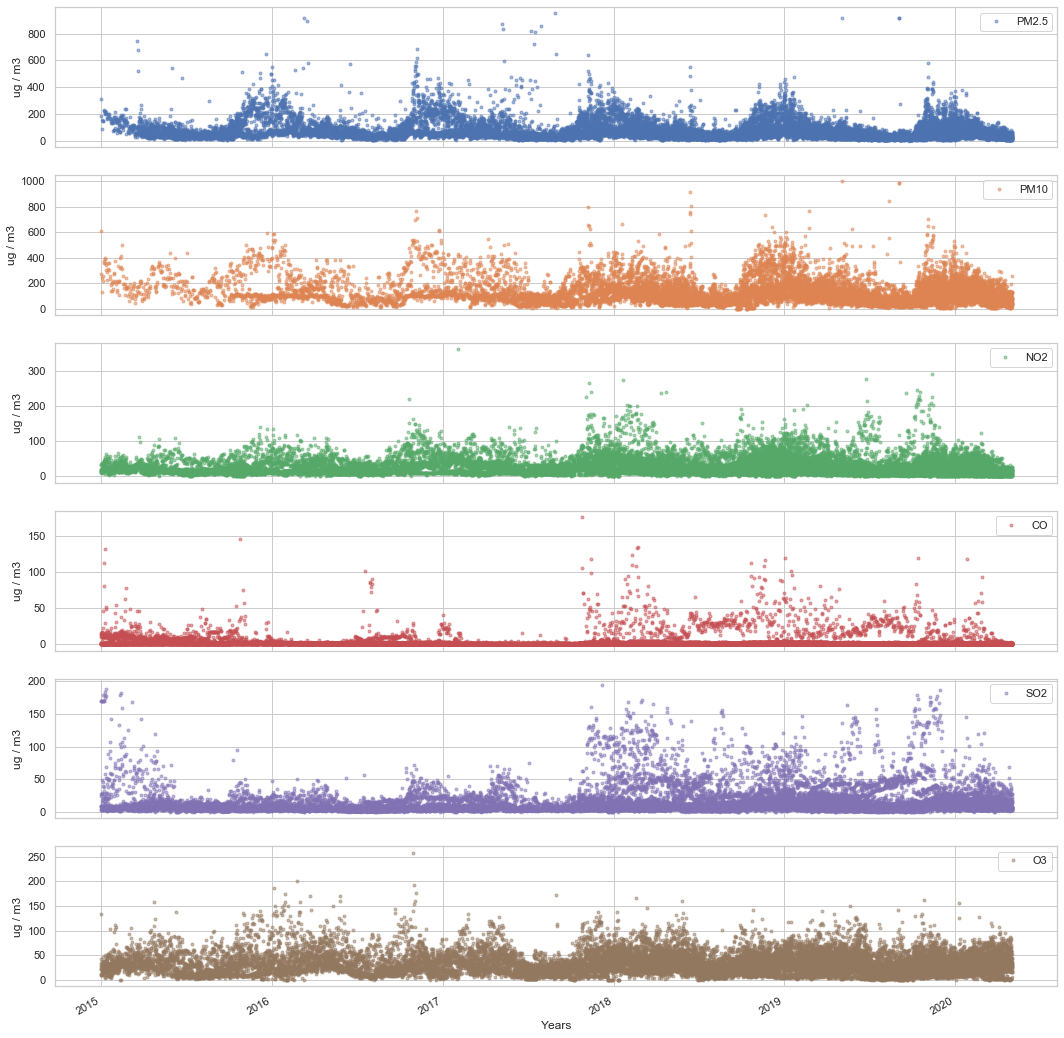

In [13]:
city_daily.set_index('Date',inplace=True)
axes = city_daily[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

In [14]:
vehicle_comp=pd.read_excel("Vehicle_composition.xls")
vehicle_comp.shape

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


(22, 7)

In [15]:
vehicle_comp.head()

,As on 31st March,Two Wheelers,"Cars, Jeeps & Taxis",Buses @,Good Vehicles,Other Vehicles,Total
0,1951,8.8,52.0,11.1,26.8,1.3,0.3
1,1961,13.2,46.6,8.6,25.3,6.3,0.7
2,1971,30.9,36.6,5.0,18.4,9.1,1.9
3,1981,48.6,21.5,3.0,10.3,16.6,5.4
4,1991,66.4,13.8,1.5,6.3,11.9,21.4


In [16]:
vehicle_comp=vehicle_comp.rename(columns={"As on 31st March" : "Year" , "Buses@" : "Buses"})

In [17]:
vehicle_comp.head()

,Year,Two Wheelers,"Cars, Jeeps & Taxis",Buses @,Good Vehicles,Other Vehicles,Total
0,1951,8.8,52.0,11.1,26.8,1.3,0.3
1,1961,13.2,46.6,8.6,25.3,6.3,0.7
2,1971,30.9,36.6,5.0,18.4,9.1,1.9
3,1981,48.6,21.5,3.0,10.3,16.6,5.4
4,1991,66.4,13.8,1.5,6.3,11.9,21.4


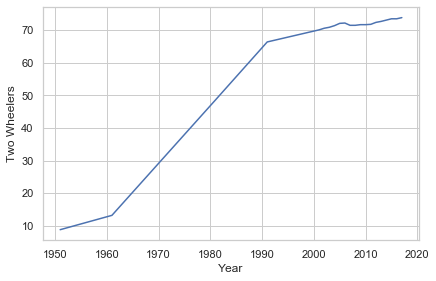

In [18]:
sns.lineplot(x="Year",y="Two Wheelers",data=vehicle_comp)

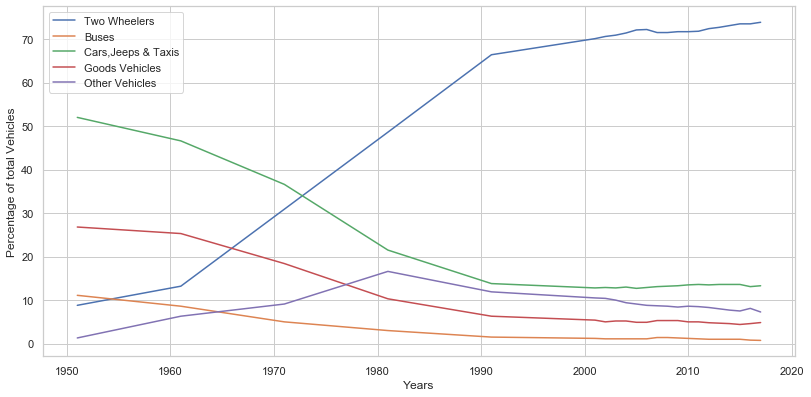

In [19]:
plt.figure(figsize=(12,6))
y1=vehicle_comp["Two Wheelers"]
y2=vehicle_comp["Buses @"]
y3=vehicle_comp["Cars, Jeeps & Taxis"]
y4=vehicle_comp["Good Vehicles"]
y5=vehicle_comp["Other Vehicles"]
x=vehicle_comp["Year"]
a1=plt.plot(x,y1,label="Two Wheelers")
a2=plt.plot(x,y2,label="Buses")
a3=plt.plot(x,y3,label="Cars,Jeeps & Taxis")
a4=plt.plot(x,y4,label="Goods Vehicles")
a5=plt.plot(x,y5,label="Other Vehicles")
plt.xlabel("Years")
plt.ylabel("Percentage of total Vehicles")
plt.legend()

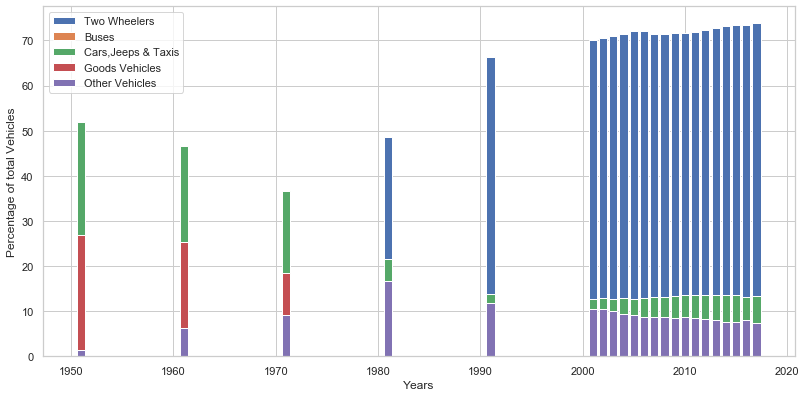

In [20]:
plt.figure(figsize=(12,6))
b1=plt.bar(x,y1,label="Two Wheelers")
b2=plt.bar(x,y2,label="Buses")
b3=plt.bar(x,y3,label="Cars,Jeeps & Taxis")
b4=plt.bar(x,y4,label="Goods Vehicles")
b5=plt.bar(x,y5,label="Other Vehicles")
plt.xlabel("Years")
plt.ylabel("Percentage of total Vehicles")
plt.legend()

In [21]:
roads=pd.read_excel("Road.xls")
roads.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Year,Road Accidents ('000),Road Accidents Deaths ('000),Road Accidents Injuries ('000),Registered Vehicles ('000),Road Length ('000 km),"Fatality rate (no. of accident deaths per 10,000 vehicles)",Vehicle density (no. of vehicles per km of road)
0,1970,114.0,15.0,70.0,1401.0,1189.0,103.5,1.18
1,1980,153.0,24.0,109.0,4521.0,1492.0,53.1,3.03
2,1990,283.0,54.0,244.0,19152.0,1984.0,28.3,9.65
3,2000,391.0,79.0,399.0,48857.0,3316.0,16.2,14.73
4,2010,500.0,135.0,528.0,127746.0,4582.0,10.5,27.88


In [22]:
roads=roads.iloc[0:13,:]

Text(0, 0.5, 'Vehicle density (no. of vehicles per km of road)')

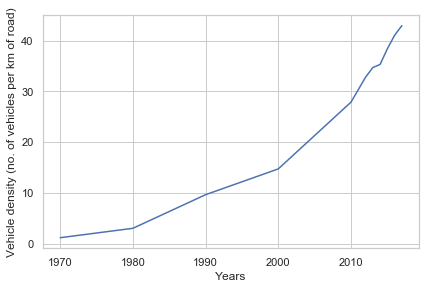

In [23]:
roads["Year"]=roads["Year"].astype(int)
x=roads["Year"]
y1=roads["Vehicle density (no. of vehicles per km of road)"]
plt.plot(x,y1)
plt.xlabel("Years")
plt.ylabel("Vehicle density (no. of vehicles per km of road)")

In [24]:
co2=pd.read_csv("CO2emit.csv")
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Mode       5 non-null      object
 1   Category   5 non-null      object
 2   Transport  5 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


Text(0.5, 22.960000000000036, 'Mode of Transport')

<Figure size 864x432 with 0 Axes>

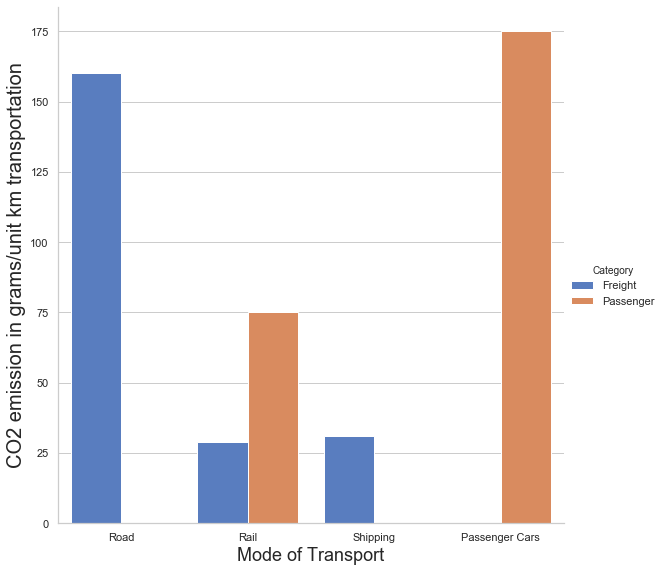

In [25]:
plt.figure(figsize=(12,6))
g = sns.catplot(x="Mode", y="Transport", hue="Category", data=co2,height=8,
                 kind="bar", palette="muted")
plt.ylabel("CO2 emission in grams/unit km transportation",fontsize=20)
plt.xlabel("Mode of Transport",fontsize=18)

In [26]:
pm=pd.read_excel("sources_pm.xls")
pm

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Source,Average for six monitoring locations - % contribution (PM10) - Winter,Average for six monitoring locations - % contribution (PM10) - Summer,Average for six monitoring locations - % contribution (PM2.5) - Winter,Average for six monitoring locations - % contribution (PM2.5) - Summer
0,Vehicles,19.70,6.40,25.10,8.50
1,Secondary Particulates,24.60,10.15,29.90,14.90
2,Biomass Burning,16.70,6.80,25.80,12.20
3,Industries,0.65,1.05,0.80,1.20
4,Coal and Fly Ash,12.30,37.20,4.80,25.95
5,Construction Material,3.10,4.10,1.50,3.00
6,Soiland Road Dust,14.40,26.50,4.30,27.10
7,Solid Waste Burning,8.75,7.75,7.75,7.20


In [27]:
pm=pm.rename(columns={"Average for six monitoring locations - % contribution (PM10) - Winter" : "PM10_winter", "Average for six monitoring locations - % contribution (PM10) - Summer" : "PM10_summer"})

In [28]:
pm=pm.rename(columns={"Average for six monitoring locations - % contribution (PM2.5) - Winter" : "PM2.5_winter", "Average for six monitoring locations - % contribution (PM2.5) - Summer" : "PM2.5_summer"})

In [29]:
pm

,Source,PM10_winter,PM10_summer,PM2.5_winter,PM2.5_summer
0,Vehicles,19.70,6.40,25.10,8.50
1,Secondary Particulates,24.60,10.15,29.90,14.90
2,Biomass Burning,16.70,6.80,25.80,12.20
3,Industries,0.65,1.05,0.80,1.20
4,Coal and Fly Ash,12.30,37.20,4.80,25.95
5,Construction Material,3.10,4.10,1.50,3.00
6,Soiland Road Dust,14.40,26.50,4.30,27.10
7,Solid Waste Burning,8.75,7.75,7.75,7.20


Text(0, 0.5, '% PM 10')

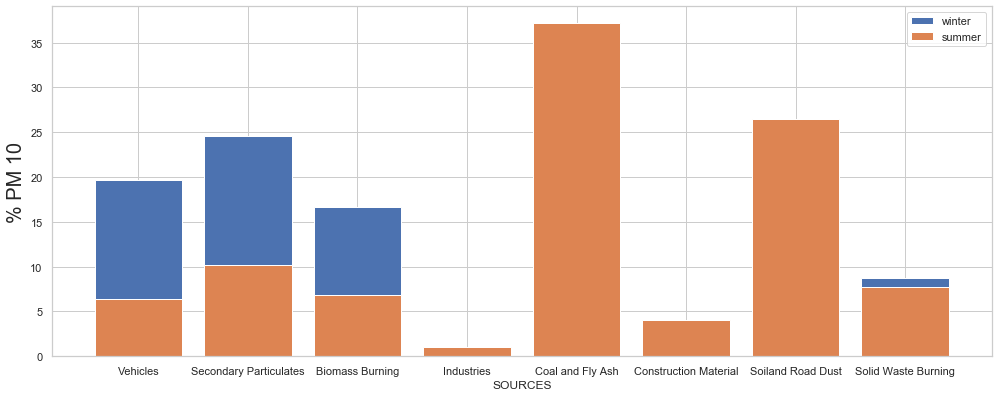

In [30]:
plt.figure(figsize=(15,6))
x=pm["Source"]
y1=pm["PM10_winter"]
y2=pm["PM10_summer"]
plt.bar(x,y1,label="winter")
plt.bar(x,y2,label="summer")
plt.legend()
plt.xlabel("SOURCES")
plt.ylabel("% PM 10",fontsize=20)

In [31]:
pm2=pd.DataFrame(index=[pm["Source"],pm["PM2.5_winter"],pm["PM2.5_summer"]])
pm2

,,
Source,PM2.5_winter,PM2.5_summer
Vehicles,25.10,8.50
Secondary Particulates,29.90,14.90
Biomass Burning,25.80,12.20
Industries,0.80,1.20
Coal and Fly Ash,4.80,25.95
Construction Material,1.50,3.00
Soiland Road Dust,4.30,27.10
Solid Waste Burning,7.75,7.20


In [32]:
pm1=pd.DataFrame([pm["Source"],pm["PM10_winter"]]).transpose()
pm1["season"]="winter"
pm1=pm1.rename(columns={"PM10_winter" : "PM10"})
pm1

,Source,PM10,season
0,Vehicles,19.7,winter
1,Secondary Particulates,24.6,winter
2,Biomass Burning,16.7,winter
3,Industries,0.65,winter
4,Coal and Fly Ash,12.3,winter
5,Construction Material,3.1,winter
6,Soiland Road Dust,14.4,winter
7,Solid Waste Burning,8.75,winter


In [33]:
pm2=pd.DataFrame([pm["Source"],pm["PM10_summer"]]).transpose()
pm2["season"]="summer"
pm2=pm2.rename(columns={"PM10_summer" : "PM10"})
pm3=pd.DataFrame([pm["Source"],pm["PM2.5_winter"]]).transpose()
pm3["season"]="winter"
pm3=pm3.rename(columns={"PM2.5_winter" : "PM2.5"})
pm4=pd.DataFrame([pm["Source"],pm["PM2.5_summer"]]).transpose()
pm4["season"]="summer"
pm4=pm4.rename(columns={"PM2.5_summer" : "PM2.5"})

In [34]:
pmnew1=pd.concat([pm1,pm2])
pmnew2=pd.concat([pm3,pm4])
pmf=pd.merge(pmnew1,pmnew2,on=["Source","season"])
pmf.head()

,Source,PM10,season,PM2.5
0,Vehicles,19.7,winter,25.1
1,Secondary Particulates,24.6,winter,29.9
2,Biomass Burning,16.7,winter,25.8
3,Industries,0.65,winter,0.8
4,Coal and Fly Ash,12.3,winter,4.8


Text(0, 0.5, '% PM 10 of total')

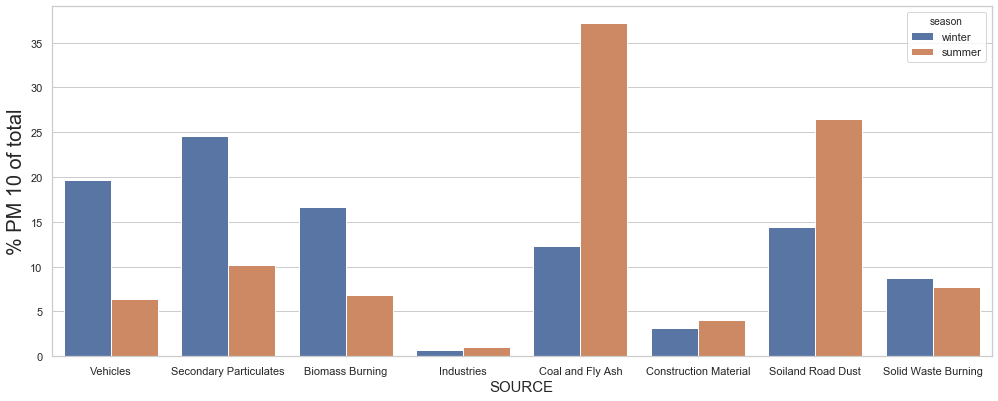

In [35]:
plt.figure(figsize=(15,6))
sns.barplot(x="Source",y="PM10",hue="season",data=pmf)
plt.xlabel("SOURCE",fontsize=15)
plt.ylabel("% PM 10 of total",fontsize=20)

Text(0, 0.5, '% PM 2.5 of total')

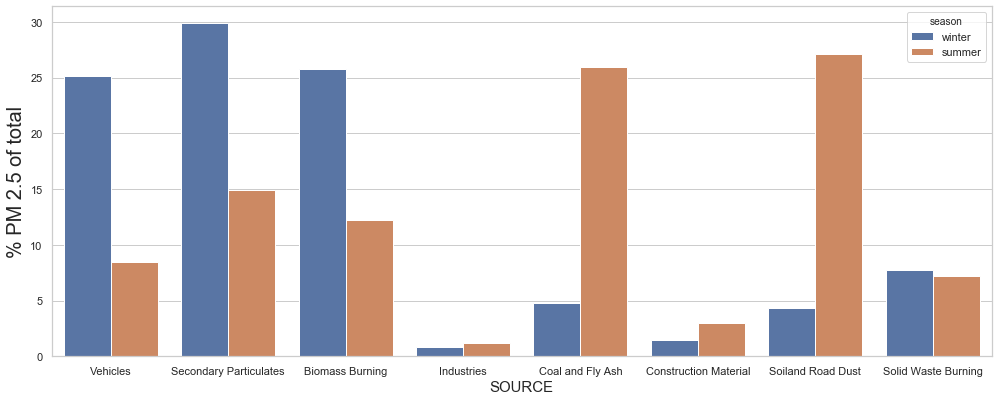

In [47]:
plt.figure(figsize=(15,6))
sns.barplot(x="Source",y="PM2.5",hue="season",data=pmf)
plt.xlabel("SOURCE",fontsize=15)
plt.ylabel("% PM 2.5 of total",fontsize=20)

In [48]:
def trend_plot(dataframe,value):
    
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2015, 2020]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()

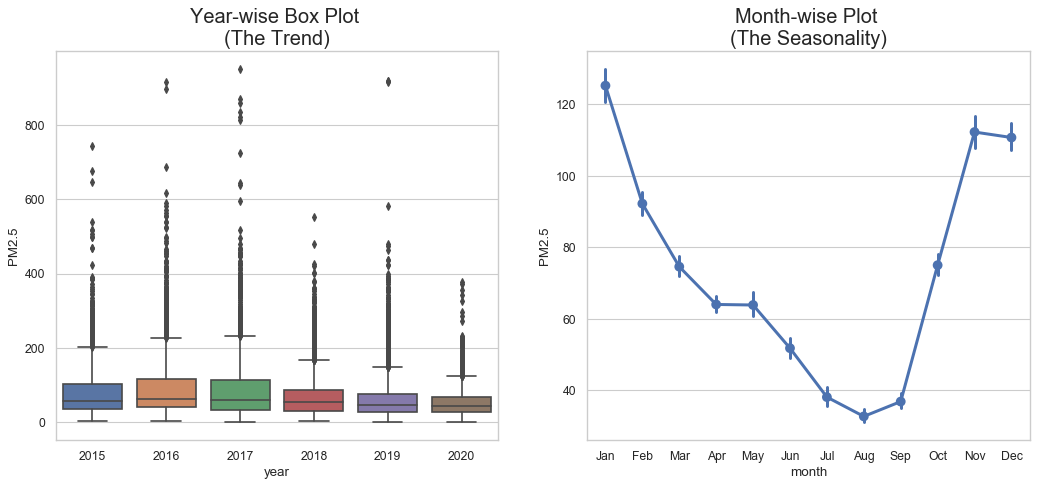

In [51]:
city_daily.reset_index(inplace=True)
df = city_daily.copy()
value='PM2.5'
trend_plot(df,value)
#city_daily.head()

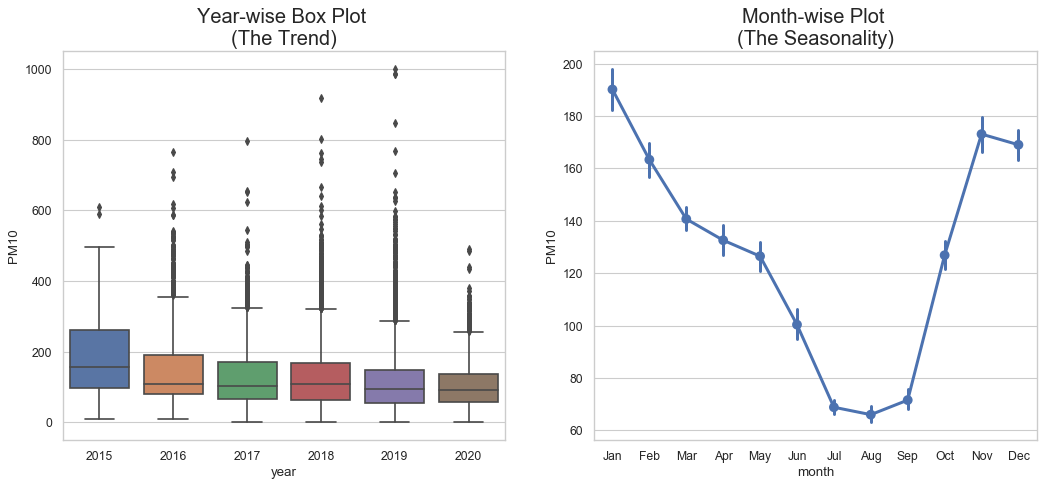

In [52]:
value='PM10'
trend_plot(df,value)

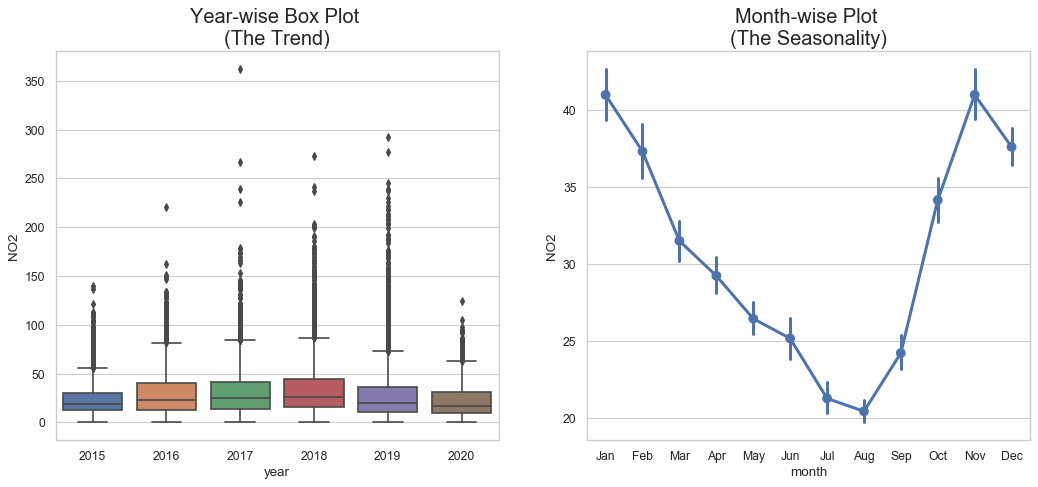

In [54]:
value='NO2'
trend_plot(df,value)

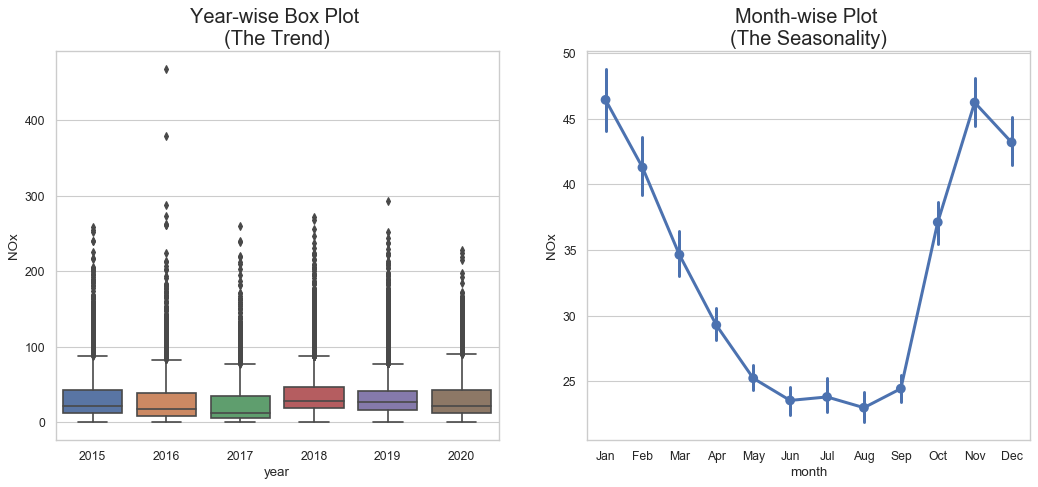

In [57]:
value='NOx'
trend_plot(df,value)
#city_daily.head()

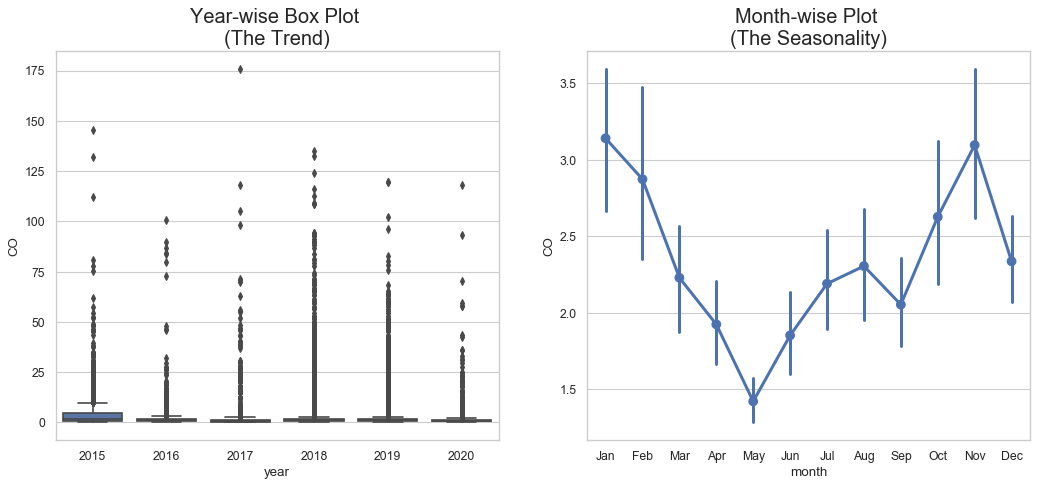

In [58]:
value='CO'
trend_plot(df,value)

In [60]:
city_daily.head()

,level_0,index,Date,City,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket,PM
0,0,0,2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,0.92,27.64,133.36,NaN,NaN,NaN
1,1,1,2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,0.97,24.55,34.06,NaN,NaN,NaN
2,2,2,2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,17.40,29.07,30.70,NaN,NaN,NaN
3,3,3,2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,1.70,18.59,36.08,NaN,NaN,NaN
4,4,4,2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,22.10,39.33,39.31,NaN,NaN,NaN


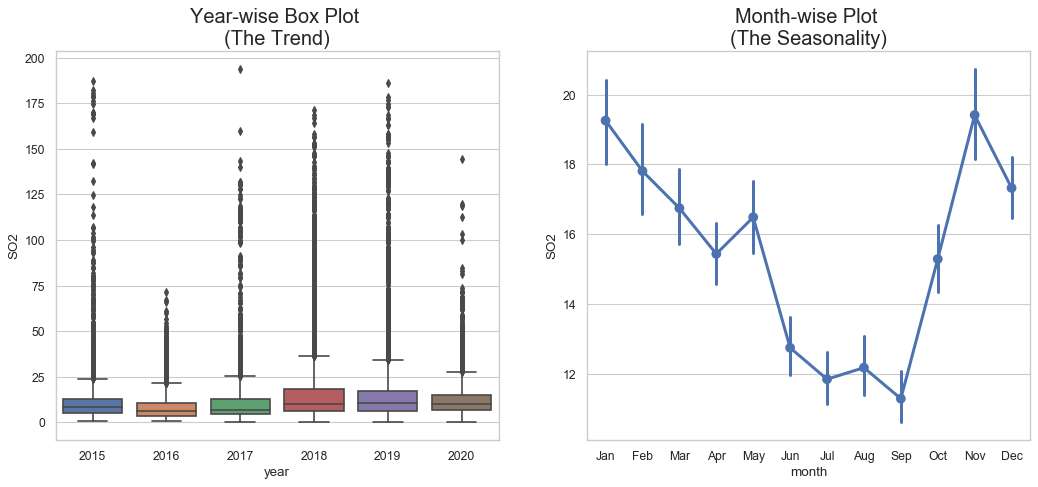

In [61]:
value='SO2'
trend_plot(df,value)

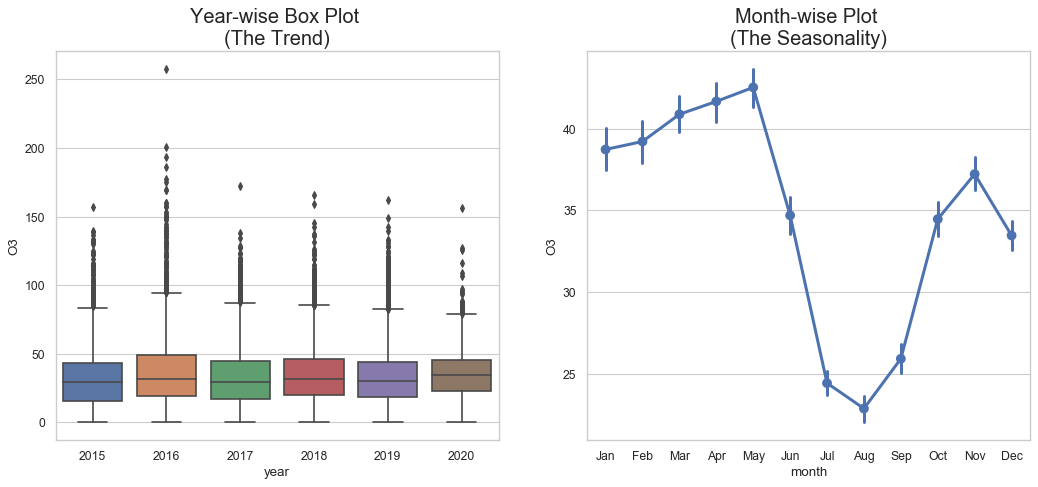

In [62]:
value='O3'
trend_plot(df,value)

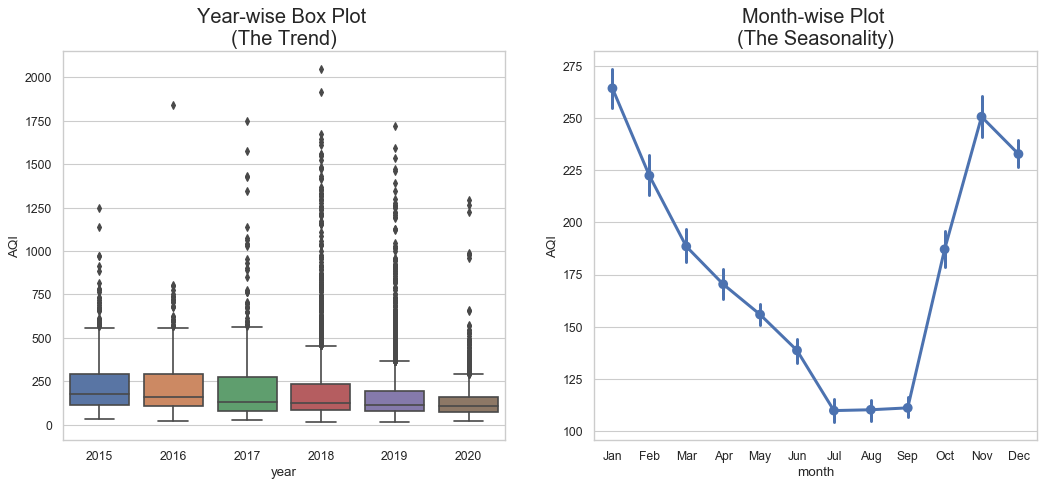

In [63]:
value='AQI'
trend_plot(df,value)

In [37]:
registered_vehicles=pd.read_excel("registered_motor_vehicles.xls")
registered_vehicles=registered_vehicles.rename(columns={"Year (As on 31st March)" : "Year", "Others**" : "Others"})
registered_vehicles.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Year,All Vehicles,Two Wheelers*,"Cars, Jeeps and Taxis",Buses @,Goods Vehicles,Others
0,1951,306,27,159,34,82,4
1,1956,426,41,203,47,119,16
2,1959,562,67,267,48,148,32
3,1960,605,76,282,54,157,36
4,1961,665,88,310,57,168,42


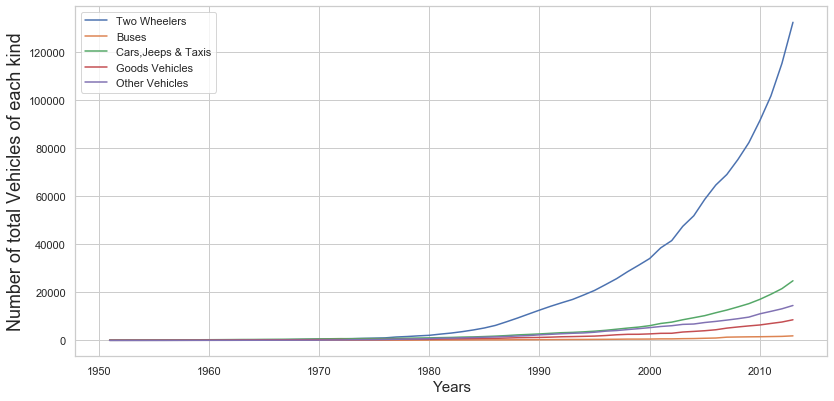

In [38]:
plt.figure(figsize=(12,6))
y1=registered_vehicles["Two Wheelers*"]
y2=registered_vehicles["Buses @"]
y3=registered_vehicles["Cars, Jeeps and Taxis"]
y4=registered_vehicles["Goods Vehicles"]
y5=registered_vehicles["Others"]
x=registered_vehicles["Year"]
a1=plt.plot(x,y1,label="Two Wheelers")
a2=plt.plot(x,y2,label="Buses")
a3=plt.plot(x,y3,label="Cars,Jeeps & Taxis")
a4=plt.plot(x,y4,label="Goods Vehicles")
a5=plt.plot(x,y5,label="Other Vehicles")
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of total Vehicles of each kind",fontsize=18)
plt.legend()

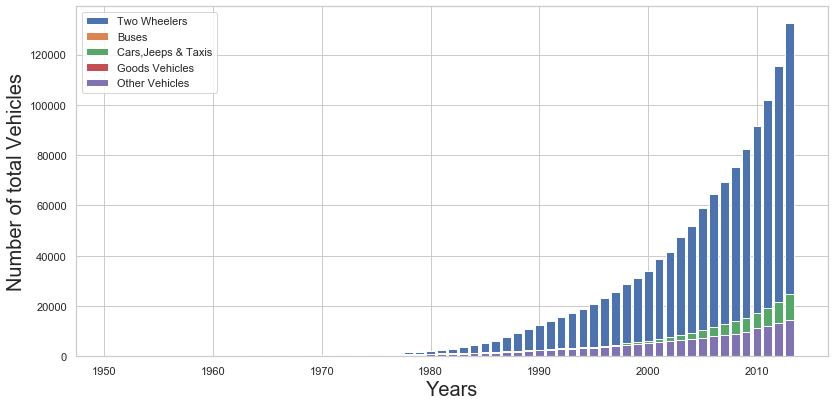

In [66]:
plt.figure(figsize=(12,6))
y1=registered_vehicles["Two Wheelers*"]
y2=registered_vehicles["Buses @"]
y3=registered_vehicles["Cars, Jeeps and Taxis"]
y4=registered_vehicles["Goods Vehicles"]
y5=registered_vehicles["Others"]
x=registered_vehicles["Year"]
a1=plt.bar(x,y1,label="Two Wheelers")
a2=plt.bar(x,y2,label="Buses")
a3=plt.bar(x,y3,label="Cars,Jeeps & Taxis")
a4=plt.bar(x,y4,label="Goods Vehicles")
a5=plt.bar(x,y5,label="Other Vehicles")
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of total Vehicles",fontsize=20)
plt.legend()

In [40]:
loco=pd.read_excel("Daily_locomotive_usage.xls")
loco.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Year,Passenger,Mixed,Goods,Shunting Inc. Siding,Departmental,Total
0,1964-65,3,NaN,315,31,2,351
1,1965-66,12,NaN,374,35,2,423
2,1966-67,27,NaN,409,39,2,477
3,1967-68,31,NaN,451,45,2,529
4,1968-69,35,1.0,504,55,3,598


In [41]:
loco["Year"]=loco["Year"].apply(lambda x: x[0:4]).astype(int)

In [46]:
loco.head()

,Year,Passenger,Mixed,Goods,Shunting Inc. Siding,Departmental,Total
0,1964,3,NaN,315,31,2,351
1,1965,12,NaN,374,35,2,423
2,1966,27,NaN,409,39,2,477
3,1967,31,NaN,451,45,2,529
4,1968,35,1.0,504,55,3,598


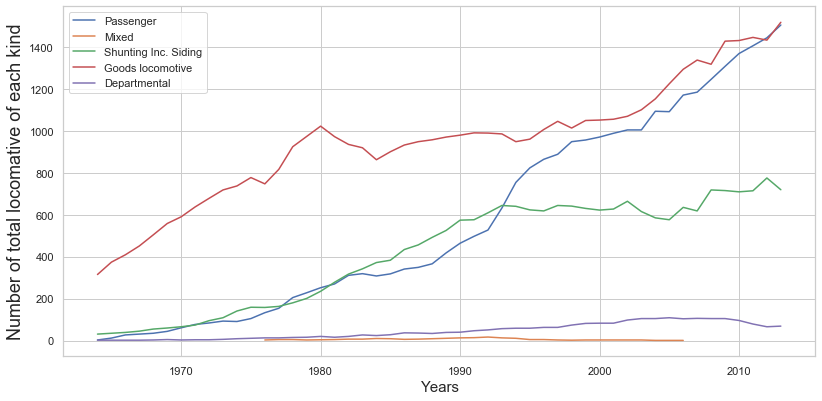

In [43]:
plt.figure(figsize=(12,6))
y1=loco["Passenger"]
y2=loco["Mixed"]
y3=loco["Shunting Inc. Siding"]
y4=loco["Goods"]
y5=loco["Departmental"]
x=loco["Year"]
a1=plt.plot(x,y1,label="Passenger")
a2=plt.plot(x,y2,label="Mixed")
a3=plt.plot(x,y3,label="Shunting Inc. Siding")
a4=plt.plot(x,y4,label="Goods locomotive")
a5=plt.plot(x,y5,label="Departmental")
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of total locomative of each kind",fontsize=18)
plt.legend()

In [44]:
labels = 'Passenger', 'Mixed', 'Shunting Inc. Siding', 'Goods','Departmental'
sizes1=[1443,1,775,1432,66]
sizes2=[970,3,622,1051,83]
#loco[loco["Year"]==2000]

Text(0.5, 0, 'Year 2000')

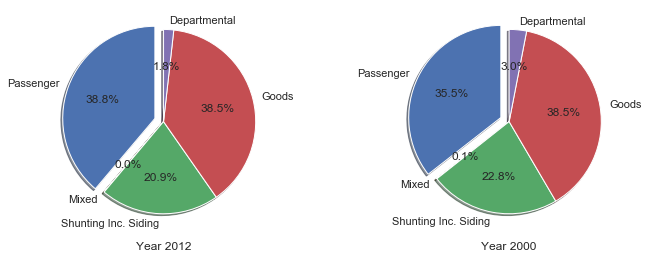

In [45]:
explode = (0.1,0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1 = plt.figure()
ax1=fig1.add_axes([0.1,0.1,0.8,0.8])
ax2=fig1.add_axes([0.9,0.1,0.8,0.8])

ax1.pie(sizes1, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.pie(sizes2, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_xlabel("Year 2012")
ax2.set_xlabel("Year 2000")

In [68]:
poll2020=pd.read_excel("Pollution_latest.xlsx")
poll2020.head()
poll2020["Date"].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       datetime.datetime(2020, 1, 4, 0, 0),
       datetime.datetime(2020, 2, 4, 0, 0),
       datetime.datetime(2020, 3, 4, 0, 0),
       datetime.datetime(2020, 4, 4, 0, 0),
       datetime.datetime(2020, 5, 4, 0, 0),
       datetime.datetime(2020, 6, 4, 0, 0),
       datetime.datetime(2020, 7, 4, 0, 0),
       datetime.datetime(2020, 8, 4, 0, 0),
       datetime.datetime(2020, 9, 4, 0, 0)], dtype=object)

In [70]:
state=pd.read_csv("Registered_by_state.csv")
state.head(10)

,State/Union Territory,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Andhra Pradesh,3966,4389,5002,5720,6458,7218,6367,7208,8059,8923,10189
1,Arunachal Pradesh,21,21,21,21,22,22,22,22,22,22,145
2,Assam,542,596,657,727,815,914,1021,1116,1235,1384,1582
3,Bihar,949,1024,1121,751,1352,1432,1577,1739,1960,2357,2673
4,Chhatisgarh,857,948,1076,1216,1375,1541,1734,1935,2115,2436,2766
5,Goa,341,366,397,436,482,529,579,624,674,727,790
6,Gujarat,5576,6008,6508,7087,7817,8622,9497,10289,10999,11873,12993
7,Haryana,1949,2122,2279,2548,2854,3087,3528,3973,4425,4792,5377
8,Himachal Pradesh,217,244,269,289,301,334,342,371,494,538,622
9,Jammu & Kashmir,330,364,399,439,478,524,570,620,668,739,927


In [92]:
cities=city_daily["City"].unique()
cities

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Delhi',
       'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur',
       'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna',
       'Shillong', 'Talcher', 'Thiruvananthapuram'], dtype=object)

In [98]:
state["State/Union Territory"].unique()
#df.head()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam ', 'Bihar ',
       'Chhatisgarh', 'Goa', 'Gujarat', 'Haryana ', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur  ', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Orissa', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu ', 'Tripura', 'Uttarakhand', 'Uttar Pradesh',
       'West Bengal', 'A. & N. Islands', 'Chandigarh', 'D. & N. Haveli ',
       'Daman & Diu', 'Delhi', 'Lakshadweep', 'Puducherry'], dtype=object)

In [99]:
city_daily.head()

,level_0,index,Date,City,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket,PM
0,0,0,2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,0.92,27.64,133.36,NaN,NaN,NaN
1,1,1,2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,0.97,24.55,34.06,NaN,NaN,NaN
2,2,2,2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,17.40,29.07,30.70,NaN,NaN,NaN
3,3,3,2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,1.70,18.59,36.08,NaN,NaN,NaN
4,4,4,2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,22.10,39.33,39.31,NaN,NaN,NaN


In [101]:
city=pd.read_csv("Registered_by_city.csv")
city.drop("Metro Cities",axis=1,inplace=True)
city.head()

,Cities,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Ahmedabad,846,899,978,1075,1632,1780,1451,1586,1691
1,Bengaluru,1593,1680,1771,1891,2232,2617,2179,2640,3016
2,Bhopal,309,333,361,392,428,476,524,571,617
3,Chennai,1257,1356,1895,2015,2167,2338,2518,2701,2919
4,Coimbatore,409,448,578,630,682,750,827,910,1002


In [104]:
cities=city["Cities"].unique()
cities

array(['Ahmedabad', 'Bengaluru', 'Bhopal', 'Chennai', 'Coimbatore',
       'Delhi', 'Hyderabad', 'Indore', 'Jaipur', 'Kanpur', 'Kochi',
       'Kolkata', 'Lucknow', 'Ludhiana', 'Madurai', 'Greater Mumbai',
       'Nagpur', 'Patna', 'Pune', 'Surat', 'Vadodara', 'Varanasi',
       'Visakhapatnam'], dtype=object)

In [107]:
df=city_daily[city_daily["City"].isin(cities)]
df.head()

,level_0,index,Date,City,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket,PM
0,0,0,2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,0.92,27.64,133.36,NaN,NaN,NaN
1,1,1,2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,0.97,24.55,34.06,NaN,NaN,NaN
2,2,2,2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,17.40,29.07,30.70,NaN,NaN,NaN
3,3,3,2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,1.70,18.59,36.08,NaN,NaN,NaN
4,4,4,2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,22.10,39.33,39.31,NaN,NaN,NaN


In [118]:
df_new=pd.DataFrame(df.set_index('Date').groupby('City')['AQI'].resample('A').mean())
df_new.reset_index(inplace=True)
df_new["Date"]=df_new["Date"].apply(lambda x:x.year)
df_new.head()

,City,Date,AQI
0,Ahmedabad,2015,310.950570
1,Ahmedabad,2016,310.162393
2,Ahmedabad,2017,558.768116
3,Ahmedabad,2018,622.263305
4,Ahmedabad,2019,516.352273


In [121]:
cities=df_new["City"].unique()
city=city[city["Cities"].isin(cities)]

In [125]:
city.shape
city.head()

,Cities,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Ahmedabad,846,899,978,1075,1632,1780,1451,1586,1691
1,Bengaluru,1593,1680,1771,1891,2232,2617,2179,2640,3016
2,Bhopal,309,333,361,392,428,476,524,571,617
3,Chennai,1257,1356,1895,2015,2167,2338,2518,2701,2919
5,Delhi,3635,3699,3971,4237,4186,4487,5492,5899,6302


In [148]:
#table=pd.pivot_table(city,index="Cities",columns=["2001","2002","2003","2004","2005","2006","2007","2008","2009"])
table=city.set_index("Cities")
table=pd.DataFrame(table.unstack())
table=table.reset_index()
table=table.rename(columns={"level_0": "Date", 0 : "Registered_Vehicles","Cities":"City"})
table["Date"]=table["Date"].astype(int)
table.head()

,Date,City,Registered_Vehicles
0,2001,Ahmedabad,846
1,2001,Bengaluru,1593
2,2001,Bhopal,309
3,2001,Chennai,1257
4,2001,Delhi,3635


In [154]:
table["Date"].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])

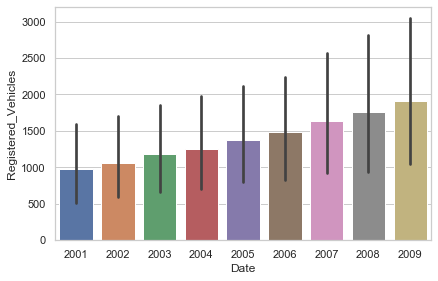

In [156]:
sns.barplot(x="Date",y="Registered_Vehicles",data=table)

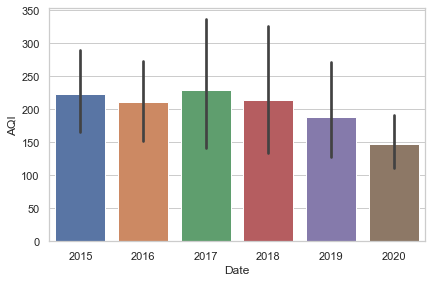

In [157]:
sns.barplot(x="Date",y="AQI",data=df_new)

In [167]:
x1 = table[['City','Registered_Vehicles']].groupby(["City"]).mean().sort_values(by='Registered_Vehicles',ascending=False).reset_index()
x1=x1[:].style.background_gradient(cmap='OrRd')

In [168]:
x2 = df_new[['City','AQI']].groupby(["City"]).mean().sort_values(by='AQI',ascending=False).reset_index()
x2=x2[:].style.background_gradient(cmap='OrRd')

In [169]:
def max_polluted_city(pollutant):
    x1 = city_daily[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

In [170]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [173]:
pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
aqi=max_polluted_city('AQI')



display_side_by_side(x1,x2)

,City,Registered_Vehicles
0,Delhi,4656.444444
1,Bengaluru,2179.888889
2,Chennai,2129.555556
3,Hyderabad,1681.000000
4,Ahmedabad,1326.444444
5,Jaipur,971.222222
6,Kolkata,798.000000
7,Lucknow,696.555556
8,Bhopal,445.666667
9,Patna,387.222222


In [172]:
display_side_by_side(pm2_5,pm10,no2,so2,co)

,City,PM2.5
0,Patna,127.480000
1,Gurugram,119.800000
2,Delhi,119.270000
3,Lucknow,111.630000
4,Ahmedabad,69.660000
5,Guwahati,69.560000
6,Kolkata,68.690000
7,Jorapokhar,65.900000
8,Brajrajnagar,63.880000
9,Talcher,63.740000


In [174]:
aqi

,City,AQI
0,Ahmedabad,467.790000
1,Delhi,263.350000
2,Patna,246.460000
3,Gurugram,228.860000
4,Lucknow,221.640000
5,Talcher,178.380000
6,Jorapokhar,161.280000
7,Guwahati,153.140000
8,Brajrajnagar,150.960000
9,Kolkata,148.580000
